**Problema 1 - integral**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def func(t):
  return np.exp(-(t**2))

def somat(a, h):
  soma = 0
  for k in range(1, N):
    soma += func(a + k*h)
  return soma

def trapezio(a, h, N, value):
  i_ab = (h/2)*(func(a)+func(value)+2*somat(a, h))
  return i_ab

x = np.arange(0, 3, 0.1)
integrais = []

a, N = 0, len(x)


for value in x:
  h = (value-a)/N
b
  integrais.append(trapezio(a, h, N, value))

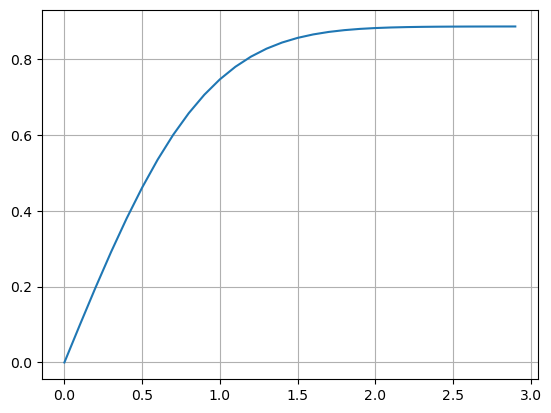

In [2]:
plt.plot(x, integrais)
plt.grid(True)
plt.show()

**Problema 2 - o limite da difracao de um telescopio**

In [133]:
import numpy as np
import matplotlib.pyplot as plt

a, b = 0, np.pi
N = 1000
h = (b-a)/N

m = np.arange(0, 3, 1)
x = np.linspace(0, 20, N)

def func(m, theta, x):
    return np.cos(m*theta - x*np.sin(theta))

def simpson(m, h, a, b, x):
    soma = 0
    for k in range(1, N-1):
        if k%2 != 0:
            soma += 4*func(m, a + k*h, x)
        else:
            soma += 2*func(m, a + k*h, x)

    return (h/3)*(func(m, a, x) + func(m, b, x) + soma)

Jx = np.empty((N, len(m)))

for m_value in range(0, len(m)):
    for i in range(0, N):
        Jx[i][m_value] = (1/np.pi)*simpson(m_value, h, a, b, x[i])

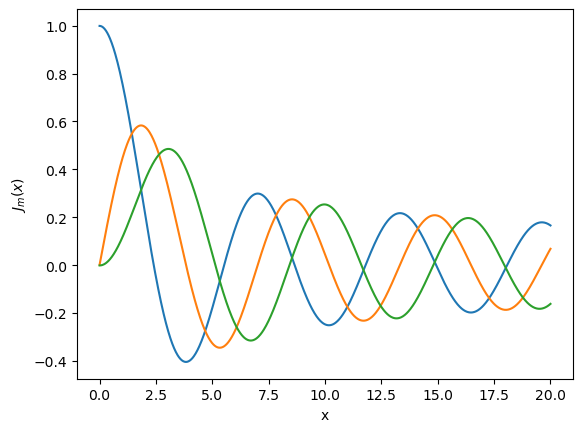

In [137]:
plt.xlabel('x')
plt.ylabel('$J_{m}(x)$')
plt.plot(x, Jx);

como parametrizamos o código para qualquer m > 3, podemos ter:

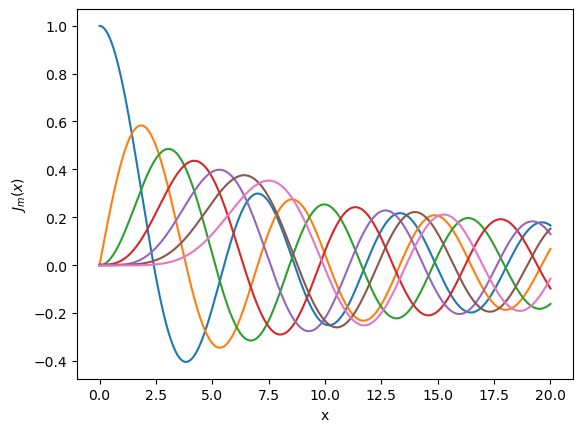

In [139]:
m2 = np.arange(0, 7, 1)       # m = 7

Jx2 = np.empty((N, len(m2)))

for m_value in range(0, len(m2)):
    for i in range(0, N):
        Jx2[i][m_value] = (1/np.pi)*simpson(m_value, h, a, b, x[i])

plt.xlabel('x')
plt.ylabel('$J_{m}(x)$')
plt.plot(x, Jx2);

**Problema 3 - integral e erro**

In [92]:
import numpy as np
import matplotlib.pyplot as plt

a, b = 0, 2
N1, N2 = 10, 20
h1, h2 = (b-a)/N1, (b-a)/N2

def func(x):
    return x**4 - 2*x + 1

def simpson(a, b, h, N):
    soma = 0
    for k in range(1, N):
        soma += func(a + k*h)
        
    return (h/2)*(func(a) + func(b) + 2*soma)

I1 = simpson(a, b, h1, N1)
I2 = simpson(a, b, h2, N2)

e1_dif = I1 - I2
e2 = (1/3)*(I2-I1)

print(f'I1: {I1} and I2: {I2}\ne1: {e1_dif} and e2: {abs(e2)}\n')

I1: 4.50656 and I2: 4.426660000000001
e1: 0.07989999999999942 and e2: 0.026633333333333137



**Como o erro calculado deste modo se compara com erro calculado através da diferença entre o valor numérico e o valor correto 4.4? Por que os dois não concordam perfeitamente?**

**Problema 4 - regra do trapezio adaptativa**

In [141]:
import numpy as np

def func(t):
  return np.sin(np.sqrt(100*t))**2

def somat(a, h, N):
  soma = 0
  for k in range(1, N):
    soma += func(a + k*h)
  return soma

def trapezio(a, b, h, N):
  i_ab = (h/2)*(func(a)+func(b)+2*somat(a, h, N))
  return i_ab
  
a, b = 0, 1
N = 1
e_base = 10e-6

h = (b-a)/N
h2 = (b-a)/(2*N)

I1 = trapezio(a, b, h, N)
I2 = trapezio(a, b, h2, 2*N)

e_atual = (1/3)*(I2-I1)

print(f'numero de fatias N: {N}')
print(f'estimativa da integral I1: {I1}')
print(f'estimativa do erro da integral e_atual: {e_atual}')

numero de fatias N: 1
estimativa da integral I1: 0.147979484546652
estimativa do erro da integral e_atual: 0.05908414108660753


In [142]:
while(abs(e_atual) > e_base):
    N *= 2
    h = (b-a)/N
    h2 = (b-a)/(2*N)
    I1 = trapezio(a, b, h, N)
    I2 = trapezio(a, b, h2, 2*N)
    e_atual = (1/2)*(I2-I1)

print(f'numero de fatias N: {N}')
print(f'estimativa da integral I1: {I1}')
print(f'estimativa do erro da integral e_atual: {e_atual}')

numero de fatias N: 1024
estimativa da integral I1: 0.45582494813241997
estimativa do erro da integral e_atual: 2.8440346132585503e-06
